In [1]:
from torchvision import transforms
from AHCRDataset import AHCRDataset
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import matplotlib.pyplot as plt
import random
import torch
from BaselineCNN import BaselineCNN
from Trainer import Trainer
import torch.nn as nn
from Paper1 import CNN14
from importlib import reload
from Paper2 import CustomCNN
from Paper3 import ArabicCharCNN
import torchvision.models as models

In [2]:

train_images_path = './Data/csvTrainImages 13440x1024.csv'
train_labels_path = './Data/csvTrainLabel 13440x1.csv'

test_images_path = './Data/csvTestImages 3360x1024.csv'
test_labels_path = './Data/csvTestLabel 3360x1.csv'

transform = transforms.Compose([
    transforms.Lambda(lambda x: x.transpose(0, 1).transpose(1, 2)),
])


train_dataset = AHCRDataset(train_images_path, train_labels_path, transform=transform)
test_dataset = AHCRDataset(test_images_path, test_labels_path, transform=transform)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [3]:
results_df = pd.DataFrame(columns=["Model", "Status", "Accuracy", "Precision", "Recall", "F1"])

In [4]:
augmentations = [
    transforms.RandomRotation(degrees=(-5, 5)),
    transforms.RandomAffine(degrees=0, translate=(0.02, 0.02)), 
    transforms.RandomPerspective(distortion_scale=0.1, p=0.5), 
        transforms.RandomResizedCrop(size=(32, 32), scale=(0.8, 1.0), ratio=(0.9, 1.1))
]

In [5]:
def random_transforms(image):

    image = image.transpose(0, 1).transpose(1, 2)
    
    n = random.randint(1, len(augmentations)) 
    
    transform = random.choice(augmentations)
    image = transform(image)
    return image

augmentations = [
    transforms.RandomRotation(degrees=(-5, 5)),
    transforms.RandomAffine(degrees=0, translate=(0.02, 0.02)), 
    transforms.RandomPerspective(distortion_scale=0.1, p=0.5), 
    transforms.RandomResizedCrop(size=(32, 32), scale=(0.8, 1.0), ratio=(0.9, 1.1))
]


transform = transforms.Compose([
    transforms.Lambda(random_transforms),
    transforms.Lambda(lambda x: x.transpose(0, 1).transpose(1, 2)),
])

train_dataset = AHCRDataset(train_images_path, train_labels_path, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

In [7]:
!git clone https://github.com/XavierSpycy/EMNIST-Classifier.git
%cd EMNIST-Classifier

fatal: destination path 'EMNIST-Classifier' already exists and is not an empty directory.
/home/ahmad/Desktop/Computer Vision/Computer-Vision-Project/EMNIST-Classifier


/home/ahmad/anaconda3/envs/torch/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [8]:
import torch
from torch.utils.data import DataLoader
from charclf.models import VGGNet, AlexNet, SpinalNet, ResNet
import torch.nn as nn

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
alexnet = AlexNet()
alexnet.to(device).load_state_dict(torch.load("model_hub/fine_tuned//alexnet_tuned.pth", map_location=device))
alexnet.classifier[8] = nn.Linear(in_features=1024, out_features=28, bias=True)

In [8]:
param_grid = {
    'lr': [0.001, 0.0005, 0.005],
    'weight_decay': [1e-4, 1e-5, 0],
    'val_ratio': [0.2]
}

Trainer.hyperparameter_tuning(alexnet, train_loader, test_loader, param_grid, num_epochs=40)

Parameters: {'lr': 0.001, 'weight_decay': 0.0001, 'val_ratio': 0.2}, Validation Loss: 0.10933871787340152, Validation Accuracy: 96.60714285714286%
Parameters: {'lr': 0.001, 'weight_decay': 1e-05, 'val_ratio': 0.2}, Validation Loss: 0.11609447186478888, Validation Accuracy: 96.51785714285714%
Parameters: {'lr': 0.001, 'weight_decay': 0, 'val_ratio': 0.2}, Validation Loss: 0.11120324626670412, Validation Accuracy: 96.81547619047619%
Parameters: {'lr': 0.0005, 'weight_decay': 0.0001, 'val_ratio': 0.2}, Validation Loss: 0.14325943272912278, Validation Accuracy: 95.08928571428571%
Parameters: {'lr': 0.0005, 'weight_decay': 1e-05, 'val_ratio': 0.2}, Validation Loss: 0.14845751064284793, Validation Accuracy: 94.94047619047619%
Parameters: {'lr': 0.0005, 'weight_decay': 0, 'val_ratio': 0.2}, Validation Loss: 0.16057943542189193, Validation Accuracy: 94.61309523809524%
Best Parameters: {'lr': 0.001, 'weight_decay': 0.0001, 'val_ratio': 0.2}, Best Validation Loss: 0.10933871787340152


(AlexNet(
   (features): Sequential(
     (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
     (1): ReLU(inplace=True)
     (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
     (3): Conv2d(16, 48, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
     (4): ReLU(inplace=True)
     (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
     (6): Conv2d(48, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (7): ReLU(inplace=True)
     (8): Conv2d(96, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (9): ReLU(inplace=True)
     (10): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (11): ReLU(inplace=True)
     (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
   )
   (avgpool): AdaptiveAvgPool2d(output_size=(3, 3))
   (classifier): Sequential(
     (0): Dropout(p=0.5, inplace=False)
     (1): Linear(in_features=576, out_features=1024, bi

In [9]:
%%time
alexnet_trainer = Trainer.do_train(alexnet, train_loader, test_loader, lr=0.001, val_ratio=0.2, weight_decay=0.0001, num_epochs=50,
                                   early_stopping_patience=10)

cuda
Epoch 1/50, Train Loss: 1.2044, Train Acc: 87.04%, Test Loss: 0.3895, Test Acc: 87.56%, 
Epoch 2/50, Train Loss: 0.4283, Train Acc: 90.77%, Test Loss: 0.2972, Test Acc: 89.64%, 
Epoch 3/50, Train Loss: 0.3257, Train Acc: 93.71%, Test Loss: 0.1959, Test Acc: 93.78%, 
Epoch 4/50, Train Loss: 0.2815, Train Acc: 93.48%, Test Loss: 0.2289, Test Acc: 92.62%, 
Epoch 5/50, Train Loss: 0.2604, Train Acc: 94.75%, Test Loss: 0.1803, Test Acc: 94.17%, 
Epoch 6/50, Train Loss: 0.2300, Train Acc: 95.74%, Test Loss: 0.1777, Test Acc: 95.06%, 
Epoch 7/50, Train Loss: 0.2178, Train Acc: 97.01%, Test Loss: 0.1467, Test Acc: 95.80%, 
Epoch 8/50, Train Loss: 0.1929, Train Acc: 96.60%, Test Loss: 0.1352, Test Acc: 95.68%, 
Epoch 9/50, Train Loss: 0.1836, Train Acc: 96.54%, Test Loss: 0.1505, Test Acc: 95.51%, 
Epoch 10/50, Train Loss: 0.1736, Train Acc: 96.59%, Test Loss: 0.1534, Test Acc: 95.39%, 
Epoch 11/50, Train Loss: 0.1550, Train Acc: 96.70%, Test Loss: 0.1613, Test Acc: 94.79%, 
Epoch 12/50, T

In [10]:
all_results = alexnet_trainer.evaluate_loader(test_loader)
model_name = "AlexNet"
status = "Augmentation + Finetune Train On EMNIST"

new_row = {
    "Model": model_name,
    "Status": status,
    "Accuracy": all_results[1],
    "Precision": all_results[2],
    "Recall": all_results[3],
    "F1": all_results[4],
}

results_df = pd.concat([results_df, pd.DataFrame([new_row])],)

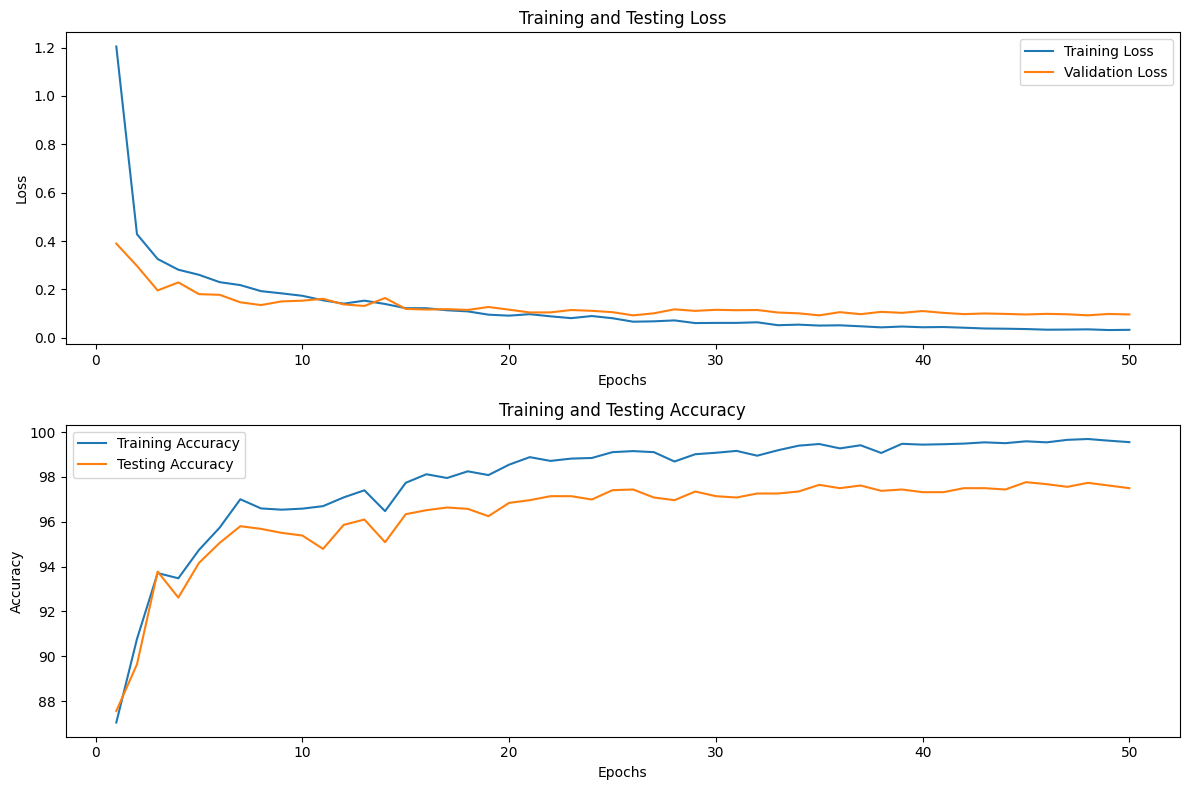

In [11]:
Trainer.plot_learning_curves(alexnet_trainer)

In [24]:
import torch.nn as nn
vggnet = VGGNet()
vggnet.to(device).load_state_dict(torch.load("model_hub/fine_tuned/vggnet_tuned.pth", map_location=device))
vggnet.classifier[8] = nn.Linear(in_features=512, out_features=28, bias=True)

In [16]:
param_grid = {
    'lr': [0.001, 0.0005, 0.005],
    'weight_decay': [1e-4, 0],
    'val_ratio': [0.2]
}

Trainer.hyperparameter_tuning(vggnet, train_loader, test_loader, param_grid, num_epochs=40)

Parameters: {'lr': 0.001, 'weight_decay': 0.0001, 'val_ratio': 0.2}, Validation Loss: 0.09206146544355126, Validation Accuracy: 97.5297619047619%
Parameters: {'lr': 0.001, 'weight_decay': 0, 'val_ratio': 0.2}, Validation Loss: 0.09615569500656763, Validation Accuracy: 97.4702380952381%
Parameters: {'lr': 0.0005, 'weight_decay': 0.0001, 'val_ratio': 0.2}, Validation Loss: 0.09623110448098127, Validation Accuracy: 97.5%
Parameters: {'lr': 0.0005, 'weight_decay': 0, 'val_ratio': 0.2}, Validation Loss: 0.10299124043733585, Validation Accuracy: 97.26190476190476%
Parameters: {'lr': 0.005, 'weight_decay': 0.0001, 'val_ratio': 0.2}, Validation Loss: 0.1506283716474361, Validation Accuracy: 95.6547619047619%
Parameters: {'lr': 0.005, 'weight_decay': 0, 'val_ratio': 0.2}, Validation Loss: 0.10073866162181147, Validation Accuracy: 97.97619047619048%
Best Parameters: {'lr': 0.001, 'weight_decay': 0.0001, 'val_ratio': 0.2}, Best Validation Loss: 0.09206146544355126


(VGGNet(
   (features): Sequential(
     (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (1): ReLU(inplace=True)
     (2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (3): ReLU(inplace=True)
     (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
     (5): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (6): ReLU(inplace=True)
     (7): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (8): ReLU(inplace=True)
     (9): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (10): ReLU(inplace=True)
     (11): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (12): ReLU(inplace=True)
     (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
     (14): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (15): ReLU(inplace=True)
     (16): Conv2d(128, 128, kernel_size=(3, 3), s

In [25]:
%%time
vggnet_trainer = Trainer.do_train(vggnet, train_loader, test_loader, lr=0.001, val_ratio=0.2, weight_decay=0.0001, num_epochs=50,
                                   early_stopping_patience=10)

cuda
Epoch 1/50, Train Loss: 2.4717, Train Acc: 75.16%, Test Loss: 1.2010, Test Acc: 76.55%, 
Epoch 2/50, Train Loss: 0.8032, Train Acc: 90.73%, Test Loss: 0.3811, Test Acc: 90.60%, 
Epoch 3/50, Train Loss: 0.3791, Train Acc: 94.26%, Test Loss: 0.2141, Test Acc: 93.90%, 
Epoch 4/50, Train Loss: 0.2573, Train Acc: 95.57%, Test Loss: 0.1793, Test Acc: 95.06%, 
Epoch 5/50, Train Loss: 0.2077, Train Acc: 96.64%, Test Loss: 0.1417, Test Acc: 95.57%, 
Epoch 6/50, Train Loss: 0.1661, Train Acc: 97.31%, Test Loss: 0.1349, Test Acc: 95.89%, 
Epoch 7/50, Train Loss: 0.1477, Train Acc: 97.43%, Test Loss: 0.1290, Test Acc: 96.19%, 
Epoch 8/50, Train Loss: 0.1297, Train Acc: 97.64%, Test Loss: 0.1274, Test Acc: 96.16%, 
Epoch 9/50, Train Loss: 0.1164, Train Acc: 98.69%, Test Loss: 0.1044, Test Acc: 96.85%, 
Epoch 10/50, Train Loss: 0.1055, Train Acc: 97.86%, Test Loss: 0.1196, Test Acc: 96.55%, 
Epoch 11/50, Train Loss: 0.1012, Train Acc: 98.70%, Test Loss: 0.1018, Test Acc: 97.05%, 
Epoch 12/50, T

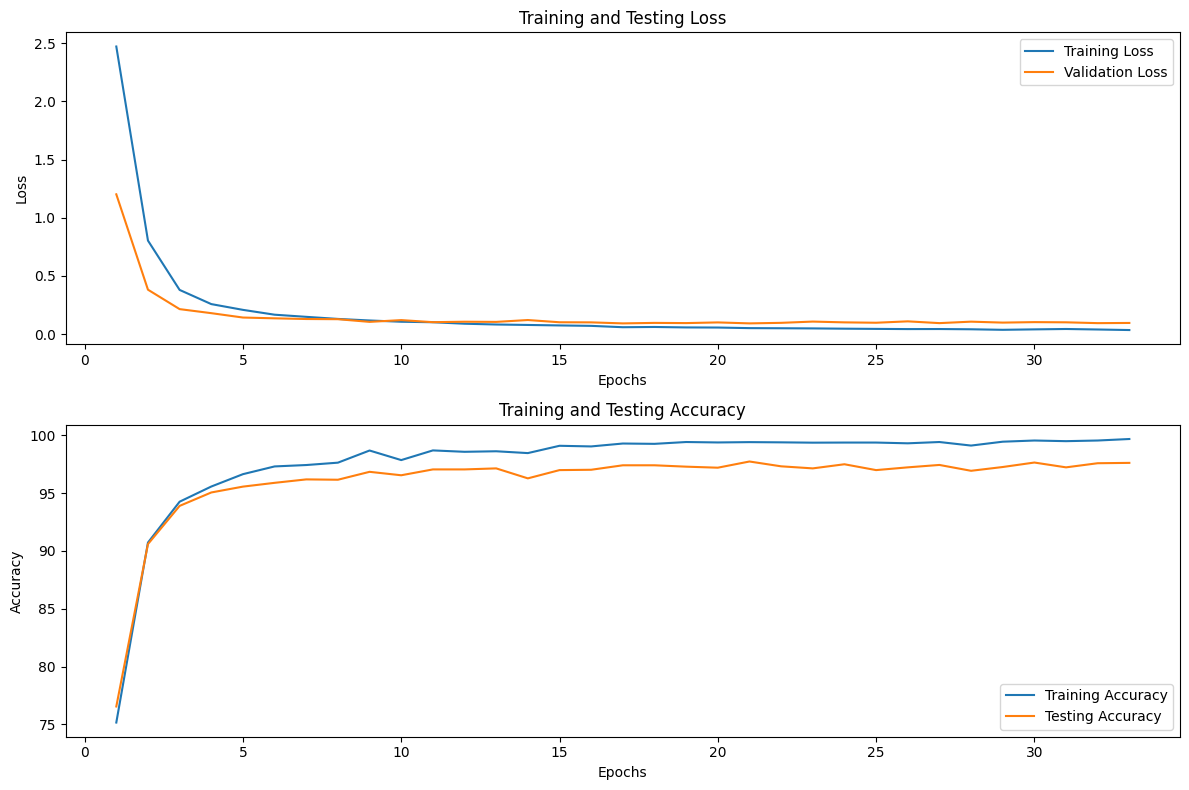

In [26]:
Trainer.plot_learning_curves(vggnet_trainer)

In [37]:
all_results = alexnet_trainer.evaluate_loader(test_loader)
model_name = "VGGnet"
status = "Augmentation + Finetune Train On EMNIST"

new_row = {
    "Model": model_name,
    "Status": status,
    "Accuracy": all_results[1],
    "Precision": all_results[2],
    "Recall": all_results[3],
    "F1": all_results[4],
}

results_df = pd.concat([results_df, pd.DataFrame([new_row])],)

In [28]:

resnet = ResNet()
resnet.to(device).load_state_dict(torch.load("model_hub/fine_tuned/resnet_tuned.pth", map_location=device))
resnet.model[10] = nn.Sequential(
    nn.Linear(in_features=128, out_features=512),  
    nn.ReLU(),
    nn.Dropout(0.5), 
    nn.Linear(in_features=512, out_features=28),  
)

In [41]:
Trainer.hyperparameter_tuning(resnet, train_loader, test_loader, param_grid, num_epochs=40)

Parameters: {'lr': 0.001, 'weight_decay': 0.0001, 'val_ratio': 0.2}, Validation Loss: 0.1249265520446846, Validation Accuracy: 96.33928571428571%
Parameters: {'lr': 0.001, 'weight_decay': 0, 'val_ratio': 0.2}, Validation Loss: 0.12285096860789466, Validation Accuracy: 96.69642857142857%
Parameters: {'lr': 0.0005, 'weight_decay': 0.0001, 'val_ratio': 0.2}, Validation Loss: 0.12269986213518763, Validation Accuracy: 96.66666666666667%
Parameters: {'lr': 0.0005, 'weight_decay': 0, 'val_ratio': 0.2}, Validation Loss: 0.12299998819757745, Validation Accuracy: 96.45833333333333%
Parameters: {'lr': 0.005, 'weight_decay': 0.0001, 'val_ratio': 0.2}, Validation Loss: 0.13181621424045484, Validation Accuracy: 96.39880952380952%
Parameters: {'lr': 0.005, 'weight_decay': 0, 'val_ratio': 0.2}, Validation Loss: 0.15270011358947125, Validation Accuracy: 96.2797619047619%
Best Parameters: {'lr': 0.0005, 'weight_decay': 0.0001, 'val_ratio': 0.2}, Best Validation Loss: 0.12269986213518763


(ResNet(
   (model): Sequential(
     (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
     (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (2): ReLU(inplace=True)
     (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
     (4): Sequential(
       (0): BasicBlock(
         (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
         (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
         (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
         (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
         (shortcut): Sequential()
       )
       (1): BasicBlock(
         (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
         (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running

In [29]:
%%time
resnet_trainer = Trainer.do_train(resnet, train_loader, test_loader, lr=0.0005, val_ratio=0.2, weight_decay=0.0001, num_epochs=50,
                                   early_stopping_patience=10)

cuda
Epoch 1/50, Train Loss: 2.0957, Train Acc: 73.24%, Test Loss: 0.8695, Test Acc: 73.72%, 
Epoch 2/50, Train Loss: 0.6836, Train Acc: 87.83%, Test Loss: 0.4172, Test Acc: 87.62%, 
Epoch 3/50, Train Loss: 0.4078, Train Acc: 91.41%, Test Loss: 0.2963, Test Acc: 90.98%, 
Epoch 4/50, Train Loss: 0.3071, Train Acc: 93.94%, Test Loss: 0.2399, Test Acc: 92.68%, 
Epoch 5/50, Train Loss: 0.2456, Train Acc: 94.78%, Test Loss: 0.2138, Test Acc: 93.48%, 
Epoch 6/50, Train Loss: 0.2069, Train Acc: 95.62%, Test Loss: 0.1967, Test Acc: 93.96%, 
Epoch 7/50, Train Loss: 0.1805, Train Acc: 96.35%, Test Loss: 0.1746, Test Acc: 94.85%, 
Epoch 8/50, Train Loss: 0.1562, Train Acc: 96.82%, Test Loss: 0.1667, Test Acc: 95.09%, 
Epoch 9/50, Train Loss: 0.1338, Train Acc: 97.14%, Test Loss: 0.1599, Test Acc: 95.39%, 
Epoch 10/50, Train Loss: 0.1261, Train Acc: 97.47%, Test Loss: 0.1558, Test Acc: 95.42%, 
Epoch 11/50, Train Loss: 0.1159, Train Acc: 97.83%, Test Loss: 0.1513, Test Acc: 95.71%, 
Epoch 12/50, T

In [17]:
all_results = resnet_trainer.evaluate_loader(test_loader)
model_name = "Resnet"
status = "Augmentation + Finetune Train On EMNIST"

new_row = {
    "Model": model_name,
    "Status": status,
    "Accuracy": all_results[1],
    "Precision": all_results[2],
    "Recall": all_results[3],
    "F1": all_results[4],
}

results_df = pd.concat([results_df, pd.DataFrame([new_row])],)

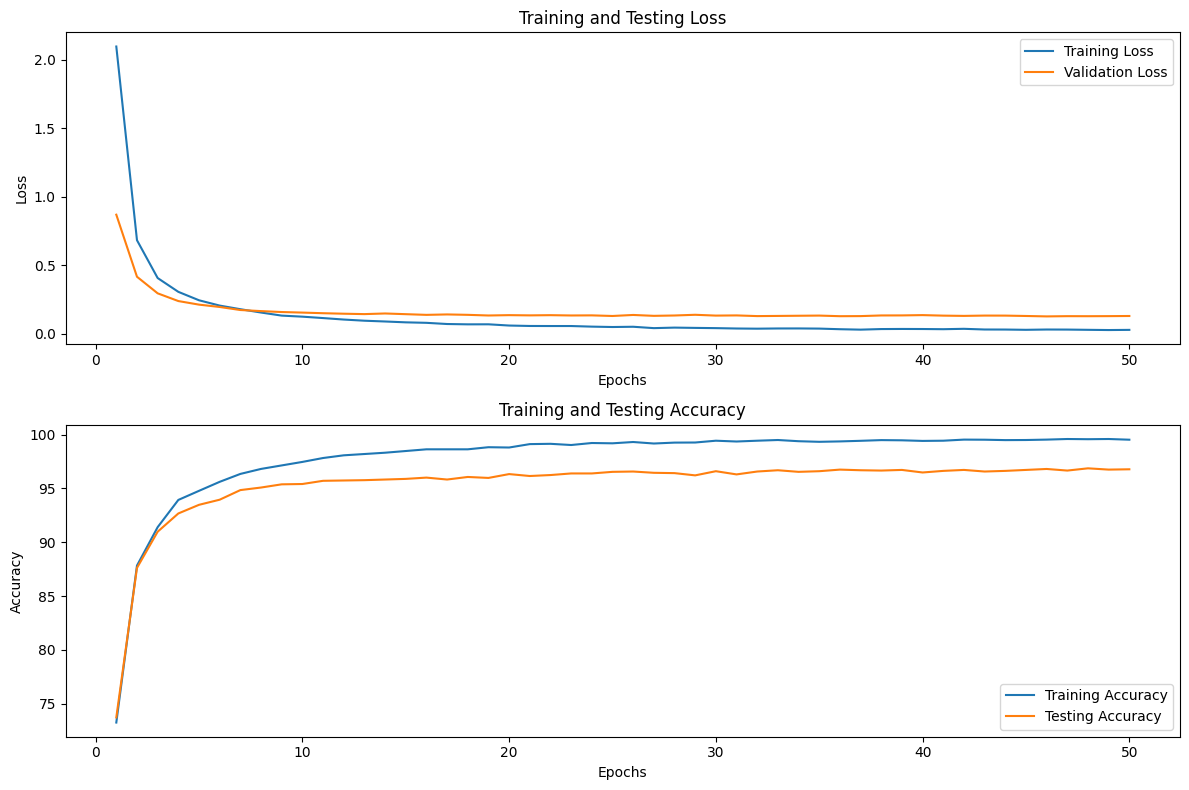

In [30]:
Trainer.plot_learning_curves(resnet_trainer)

In [34]:
results_df['Avg_Precision'] = results_df['Precision'].apply(lambda x: sum(x) / len(x))
results_df['Avg_Recall'] = results_df['Recall'].apply(lambda x: sum(x) / len(x))
results_df['Avg_F1'] = results_df['F1'].apply(lambda x: sum(x) / len(x))


In [20]:
results_df[['Model', 'Status', 'Accuracy', 'Avg_Precision', 'Avg_Recall', 'Avg_F1']].to_csv('results7.csv', index=False)